# Prueba OPI Analytics

## Prueba A. Estimación de Bebés en Toluca

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### Tabla 1

In [3]:
PATH1 = "D:/0_DATALAB/OPI/Ejercicio_A(Bebes)/toluca.csv"
data1 = round(pd.read_csv(PATH1).set_index('Año').fillna(0),2)# csv
print(type(data1))
print(data1.columns)
data1

<class 'pandas.core.frame.DataFrame'>
Index(['Edomex TOTAL', 'Toluca TOTAL', '%Toluca', 'Fcst'], dtype='object')


,Edomex TOTAL,Toluca TOTAL,%Toluca,Fcst
Año,,,,
2008,290337.0,39810.0,0.14,0.0
2009,286081.0,41273.0,0.14,0.0
2010,271902.0,39787.0,0.15,0.0
2011,280865.0,40027.0,0.14,0.0
2012,289888.0,40846.0,0.14,0.0
2013,279869.0,37714.0,0.13,40348.6
2014,215108.0,28138.0,0.13,39929.4
2015,266552.0,35872.0,0.13,37302.4
2016,0.0,0.0,0.00,36519.4


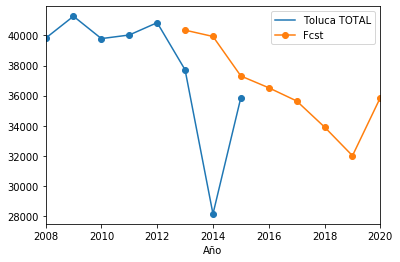

In [5]:
#data1['Edomex TOTAL'].iloc[:8].plot(legend=True,marker='o')
data1['Toluca TOTAL'].head(8).plot(legend=True,marker='o')
data1['Fcst'].tail(8).plot(legend=True,marker='o')


In [20]:
round(data1['%Toluca'].head(8).mean(),3)

0.139

#### tabla 2

In [30]:
PATH2 = "D:/0_DATALAB/OPI/Ejercicio_A(Bebes)/toluca2.csv"
data2 = round(pd.read_csv(PATH2),0).set_index('año').fillna(0)# csv
print(type(data2))
data2

<class 'pandas.core.frame.DataFrame'>


,MEX,EdoMex,%EdoMex,Toluca,Fcst1,Fcst2,Fcst
año,,,,,,,
2010,2643908.0,335898.0,0.0,46690.0,0.0,45738,0.0
2011,2586287.0,327165.0,0.0,45476.0,0.0,44786,0.0
2012,2498880.0,326412.0,0.0,45371.0,0.0,43835,0.0
2013,2478889.0,317834.0,0.0,44179.0,45846.0,42883,0.0
2014,2463420.0,316088.0,0.0,43936.0,45009.0,41931,0.0
2015,2353596.0,303778.0,0.0,42225.0,44495.0,40979,0.0
2016,2293708.0,295635.0,0.0,41093.0,43447.0,40028,0.0
2017,2234039.0,286204.0,0.0,39782.0,42418.0,39076,39782.0
2018,0.0,0.0,0.0,0.0,41034.0,38124,39579.0


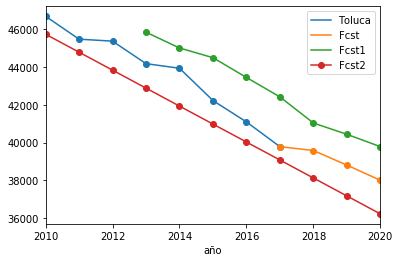

In [25]:
data2['Toluca'].iloc[:8].plot(legend=True,marker='o')
data2['Fcst'].tail(4).plot(legend=True,marker='o')
data2['Fcst1'].tail(8).plot(legend=True,marker='o')
data2['Fcst2'].plot(legend=True,marker='o')

El criterio de de pronóstico es el siguiente: Fcts1 es un MA(3) y Fcts2 una aproximación lineal y Fcts es un promedio de ambos.

### Conclusión Caso A
El estimado de bebés de 0-6 meses en Toluca para el 2020 es de entre **35,872 y 38,002 bebés**.

**Justificacion**:

Con base a los datos:

* Fuente:Dirección de Planeación, Programación, Evaluación y Estadística con Bases de Certificados de Nacimiento, Sistema Nacional de Información en Salud, Secretaria de Salud 2008-2014.(Dirección General de Informacion en Salud, 2015)
* Nacimientos registrados por Entidad federativa de residencia habitual de la madre, Periodo y Sexo (https://www.inegi.org.mx/app/tabulados/interactivos/default?px=Natalidad_01&bd=Natalidad, Con cifras que se refieren a los nacimientos registrados por entidad federativa de residencia habitual de la madre. Fuente: INEGI. Estadísticas de Natalidad.) 

Se proyectaron los nacimientos para el estado de México y se estimó la proporción correspondiente para Toluca.

En la sigiente tablas se muestran los datos involucrados:

## B. Análisis de Comparación de Precios


----------------------------------------------------------------------
### 1.Procesamiento de los datos
----------------------------------------------------------------------

In [ ]:
from pyspark.sql import SQLContext
sqlContext = SQLContext(sc)

In [ ]:
#    ¿Cuántos registros hay?

registros = sqlContext.sql("SELECT COUNT(*) FROM profeco").show()
count = dataframe.first()['count'] 

#    ¿Cuántas categorías?
#val cats = data.select(countDistinct("categorias"))
categorias = sqlContext.sql("SELECT COUNT(DISTINCT categorias) FROM profeco").show()

#    ¿Cómo podrías determinar la calidad de los datos?


#    ¿Detectaste algún tipo de inconsistencia o error en la fuente?
R. No cuenta con columna PRIMARY KEY ID 
Hay registros deben homologarse o estandarizarse
Hay registros vacíos o con NA o sin información

#    ¿Cuáles son los productos más monitoreados en cada entidad?
productos_max = sqlContext.sql("""
    SELECT estado, municipio, producto, MAX(conteo) AS maximo
    FROM (
        SELECT estado, municipio, producto, COUNT(producto) AS conteo
        FROM profeco
        GROUP BY estado, municipio, producto)
    """).show()

#    ¿Cuál es la cadena comercial con mayor variedad de productos monitoreados?
variedad_max = sqlContext.sql("""
    SELECT cadenacomercial, MAX(conteo)
    FROM(
        SELECT cadenacomercial, COUNT(producto) AS 'conteo' 
        FROM profeco
        GROUP BY cadenacomercial)
    """).show()

#    Genera una canasta de productos básicos que te permita comparar los precios geográfica y temporalmente. 

 $CB = {maíz, frijol, leche, huevo, arroz, azucar, harina, aceite, atun,...}$
 
 Métrica: total de precios de la CB:
 
 $CCB = CCB(t, X, E) = pmaíz + pfrijol + pleche + phuevo + parroz + pazucar + pharina + paceite + patun +...$
 
 $t$: fecha, $X$: producto, $E$: Estado
 
 * Tabla Final: | fecha | estado | CCB |
 * Tablas Previas: | fecha | estado | producto | precio |

Dashbd: Serie de Tiempo de CCB segmentada por estado + Tabla de Ranking por Estado

In [ ]:
CB = sqlContext.sql("""
    SELECT fecha, estado, producto, AVG(precio), 
    FROM profeco
    WHERE producto IN {maíz, frijol, leche, huevo, arroz, azucar, harina, aceite, atun,...}
    """).show()


pivotX = CB.pivot_table(
    index=['fecha'], 
    columns=['estado'],#, 'usa'], 
    values='precios',
    aggfunc=np.avg
).reset_index()

pivotX.index.name = pivotX.columns.name = None

tableX = round(pivotX.fillna(0),1)



----------------------------------------------------------------------
## 2. Análisis exploratorio.
----------------------------------------------------------------------

In [ ]:
#    ¿Cuál es la ciudad más cara del país? (CIUDAD?)
ciudad = sqlContext.sql("""
    SELECT estado, municipio, MAX(precio_prom)
    FROM(
        SELECT estado, municipio, AVG(precio) AS 'precio_prom' 
        FROM profeco
        GROUP BY cadenacomercial)
    """).show()

#    ¿Cuál es la más barata?
ciudad = sqlContext.sql("""
    SELECT estado, municipio, MIN(precio_prom)
    FROM(
        SELECT estado, municipio, AVG(precio) AS 'precio_prom' 
        FROM profeco
        GROUP BY cadenacomercial)
    """).show()

#    ¿Hay algún patrón estacional entre años?


#    ¿Cuál es el estado más caro y en qué mes?
ciudad = sqlContext.sql("""
    SELECT estado, municipio, MAX(precio_prom)
    FROM(
        SELECT estado, municipio, AVG(precio) AS 'precio_prom' 
        FROM profeco
        GROUP BY cadenacomercial)
    """).show()

In [ ]:
table[{'DISTRITO FEDERAL','MEXICO',....}].plot(legend=True,marker='o')

* **Este caso fué hecho sin la ejecusión en el ambiente spark con procesamiento paralelo para archivos  grandes. Solo el bosquejaron los códigos involucrados para ejecutar los análisis y dar respuesta propuesta a las preguntas del problema**

## C. Buy Online Pickup at Store (BOPS) Initiative

## Brick-and-Mortar Sales

In [5]:
PATH3 = "D:/0_DATALAB/OPI/Ejercicio_C(BOPS)/BOPS_case/BOPS_case/B&PSales.csv"
bops_bm = pd.read_csv(PATH3, delimiter='|')#, sep=r'\s*,\s*', header=0, encoding='ascii', engine='python') # csv
#bops_bm = data3.loc[:, ~data3.columns.str.contains('^Unnamed')]
#print(type(bops_bm))
#print(bops_bm.shape)
#print(bops_bm.dtypes)
bops_bm.head(5)

,id (store),year,month,week,usa,after,sales
0,1,2011,4,16,0,0,118690.700000
1,1,2011,4,17,0,0,113804.266667
2,1,2011,4,18,0,0,172104.333333
3,1,2011,5,19,0,0,105590.966667
4,1,2011,5,20,0,0,94884.300000


In [214]:
#grouped_year.get_group(2012)
#round(bops_bm.groupby('year')['sales'].agg(sum),1)

### After vs Before

In [15]:
pivot = bops_bm.pivot_table(
    index=['year', 'month'], 
    columns=['after'],#, 'usa'], 
    values='sales',
    aggfunc=np.sum
).reset_index()

pivot.index.name = pivot.columns.name = None

table = round(pivot.rename(columns={0:'before',1:'after'}).fillna(0),1)
#table 

In [73]:
table['Diff'] = table['before']-table['after']
#table

In [74]:
summ_bm = bops_bm.pivot_table(
    index=['after'],
    values='sales',
    aggfunc=np.sum
).reset_index()

pivot.index.name = pivot.columns.name = None
#round(summ_bm ,1)

In [76]:
print('-----------------------------------------')
print("Una diferencia de:", round(summ_bm['sales'].min() - summ_bm['sales'].max(),1))
print('-----------------------------------------')

-----------------------------------------
Una diferencia de: -17111574.1
-----------------------------------------


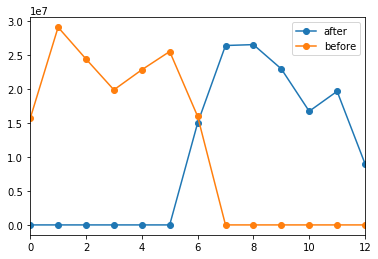

In [85]:
table[{'before','after'}].plot(legend=True,marker='o')

### Usa vs Canada

In [17]:
pivot2 = bops_bm.pivot_table(
    index=['year', 'month'], 
    columns=['usa'], 
    values='sales',
    aggfunc=np.sum
).reset_index()

pivot2.index.name = pivot2.columns.name = None

table2 = round(pivot2.rename(columns={0:'canada',1:'usa'}).fillna(0),1)
#table2 

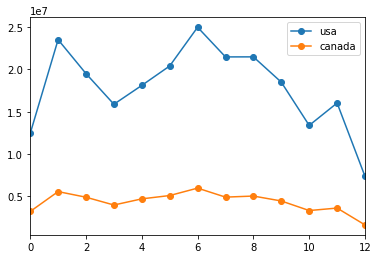

In [243]:
table2[{'usa','canada'}].plot(legend=True,marker='o')

### Full Comparison

In [26]:
pivot3 = bops_bm.pivot_table(
    index=['year', 'month'], 
    columns=['after', 'usa'], 
    values='sales',
    aggfunc=np.sum
).reset_index()

pivot3.index.name = pivot3.columns.name = None
#pivot3

In [84]:
flattened = pd.DataFrame(pivot3.to_records())
#round(flattened ,2)
#print(flattened.columns)
flattened.columns = [hdr.replace("(","").replace(")","").replace(",","") \
                     for hdr in flattened.columns]
#print(flattened.columns)

In [77]:
Table3 = round(flattened.rename(columns={'year ''':'year','month ''':'month','0 0':'before_usa','0 1':'before_can','1 0':'after_usa','1 1':'after_can'}).fillna(0),1)
#Table3 

In [78]:
Table3['DiffUsa']= Table3['before_usa']-Table3['after_usa']
Table3['DiffCan']= Table3['before_can']-Table3['after_can']
#Table3

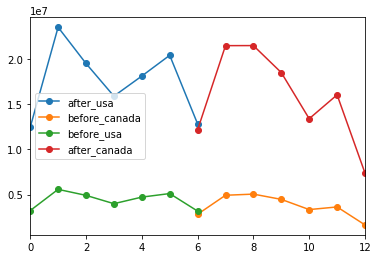

In [342]:
#pivot3[{(0,0),(0,1),(1,0),(1,1)}].plot(legend=True,marker='o')
Table3[{'before_usa','after_usa','before_canada','after_canada'}].plot(legend=True,marker='o')

## Online Sales

In [57]:
PATH4 = "D:/0_DATALAB/OPI/Ejercicio_C(BOPS)/BOPS_case/BOPS_case/OnlineSales.csv"
bops_online = pd.read_csv(PATH4, delimiter='|') # csv
#bops_online = data4.loc[:, ~data4.columns.str.contains('^Unnamed')]
#print(type(bops_online))
#print(bops_online.shape)
#print(bops_online.dtypes)
round(bops_online.head(5),1)

,id (DMA),year,month,week,after,close,sales
0,1,2011,4,17,0,1,18564.5
1,1,2011,4,18,0,1,30882.6
2,1,2011,5,19,0,1,37424.9
3,1,2011,5,20,0,1,32562.7
4,1,2011,5,21,0,1,35772.7


In [69]:
#bops_online['sales'].plot(legend=True,marker='o')
#bops_online.columns

### After vs Before

In [42]:
pivot4 = bops_online.pivot_table(
    index=['year', 'month'], 
    columns=['after'],#, 'usa'], 
    values='sales',
    aggfunc=np.sum
).reset_index()

pivot4.index.name = pivot4.columns.name = None

table4 = round(pivot4.rename(columns={0:'before',1:'after'}).fillna(0),1)
#table4 

In [87]:
summ_online = bops_online.pivot_table(
    index=['after'],
    values='sales',
    aggfunc=np.sum
).reset_index()

summ_online.index.name = summ_online.columns.name = None
#round(summ_online ,1)
print('-----------------------------------------')
print("Una diferencia de:", round(summ_online['sales'].min() - summ_online['sales'].max(),1))
print('-----------------------------------------')

-----------------------------------------
Una diferencia de: -17111574.1
-----------------------------------------


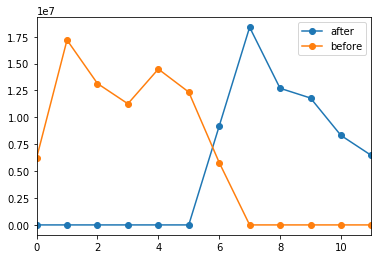

In [39]:
table4[{'before','after'}].plot(legend=True,marker='o')

In [71]:
table4['Diff']=table4['before']-table4['after']
#table4

### By Closness

In [70]:
pivot5 = bops_online.pivot_table(
    index=['year', 'month'], 
    columns=['close'], 
    values='sales',
    aggfunc=np.sum
).reset_index()

pivot5.index.name = pivot2.columns.name = None

table5 = round(pivot5.rename(columns={0:'far',1:'close'}).fillna(0),1)
#table5 

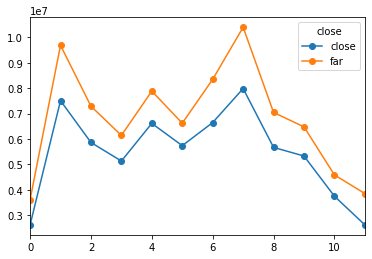

In [349]:
table5[{'far','close'}].plot(legend=True,marker='o')

### Full Comparison

In [53]:
pivot6 = bops_online.pivot_table(
    index=['year', 'month'],
    columns=['after','close'], 
    values='sales',
    aggfunc=np.sum
).reset_index()

pivot6.index.name = pivot6.columns.name = None
#pivot6

flattened = pd.DataFrame(pivot6.to_records())
#print(flattened.columns)
#round(flattened ,2)

flattened.columns = [hdr.replace("(","").replace(")","").replace(",","") \
                     for hdr in flattened.columns]
#print(flattened.columns)

Table6 = round(flattened.rename(columns={'year ''':'year','month ''':'month','0 0':'before_close','0 1':'before_far','1 0':'after_close','1 1':'after_far'}).fillna(0),1)
#Table6 

In [72]:
Table6['CloseDiff']=Table6['before_close']-Table6['after_close']
Table6['FarDiff']=Table6['before_far']-Table6['after_far']

#Table6 

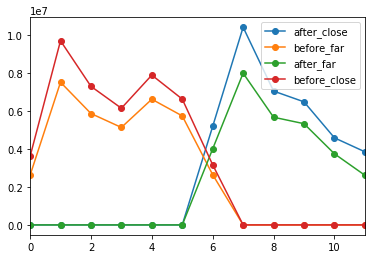

In [54]:
Table6[{'before_close','after_close','before_far','after_far'}].plot(legend=True,marker='o')

### Conclusión Caso C

* **¿Deberían expandirse a Canadá?**

R. The over all behavior of sales didn´t show a substancial benefit, the general trend is negative after the BOPS implementation. We recomend to to make adjustments to the strattegy implementation...

* **¿Cuántos millones de dólaresse ganaron o perdieron a partir del programa? Explicatu razonamiento y metodología**

R. We made a general trend comparison analysis form sales data after and before de implementation of BOPS strategy. Algo we include market trend segmentation....